In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mirella Glowinska
Source: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/code

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [25]:
csv_file_path = '/content/drive/MyDrive/Datasets/Breast_Cancer.csv'
df = pd.read_csv(csv_file_path)
print(df.head())

print(df.describe())

   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [5]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 4024
Number of columns: 16


In [17]:
print(f'Column names: {df.columns}')

Column names: Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [27]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop(columns=["Status"])
y = df["Status"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.867080745341615

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       685
           1       0.56      0.53      0.54       120

    accuracy                           0.87       805
   macro avg       0.74      0.73      0.73       805
weighted avg       0.86      0.87      0.87       805



In [11]:
cm= confusion_matrix(y_test, y_pred)

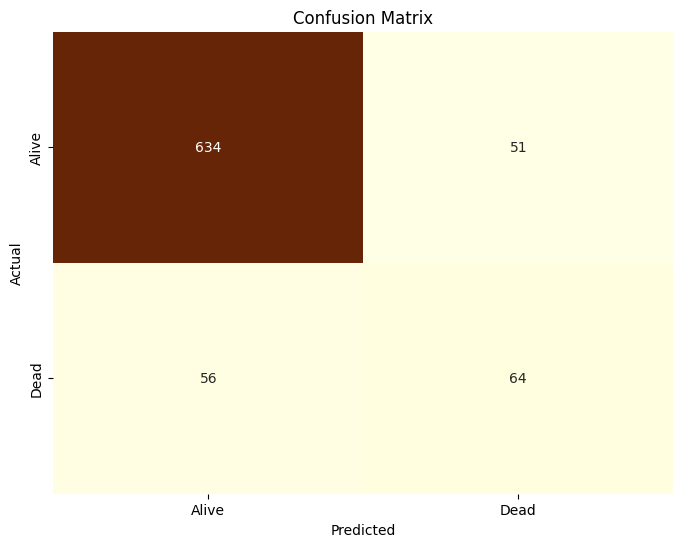

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            xticklabels=['Alive', 'Dead'],
            yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()